Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from metrics import print_evaluation_metrics

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df.drop(columns=["Cumulative_deaths"])

df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
df = df.dropna()

dates = df.index.values
df = df.select_dtypes(exclude=["object"])

KeyError: "['Cumulative_deaths'] not found in axis"

Train test split

In [ ]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Create the model

In [ ]:
model = LinearRegression().fit(
    train.drop(columns=[target_column]), train[target_column]
)

pred = model.predict(test.drop(columns=[target_column]))
pred

array([  763.73111365,   759.42781862,   763.70700523,   767.92607482,
         773.83689236,   825.65042958,  1102.77920359,   -91.71863592,
         786.48575513,   790.41923702,   794.71438971,   799.73748362,
         712.94281003,  1212.81858678,   807.50286752,   812.68194276,
        -392.43824596,   821.13336584,   826.43451951,   877.92636692,
        1345.10830993,   838.64691736,   838.16467109,   842.22766114,
         846.56810589, -4975.98703355, -5200.03597043,  1463.40552443,
        1451.05415354,   858.65588863,   862.6614847 ,   867.3460972 ,
         872.16489234,   891.29889357, -3242.69658656,  1002.10957364,
       -2178.55698044,   890.8864386 ,   895.60422261, -1927.88718435,
         920.6666577 , -2760.6552517 ,   919.64946628,   913.67144912,
         916.64162638,   922.90633476,   929.06541359,   952.25137791,
        1487.1645159 ,   945.2803639 ,   941.94681674,   945.24121973,
         948.58595585,   954.46188416,   984.71706106,  1471.04959438,
      

Plot the result

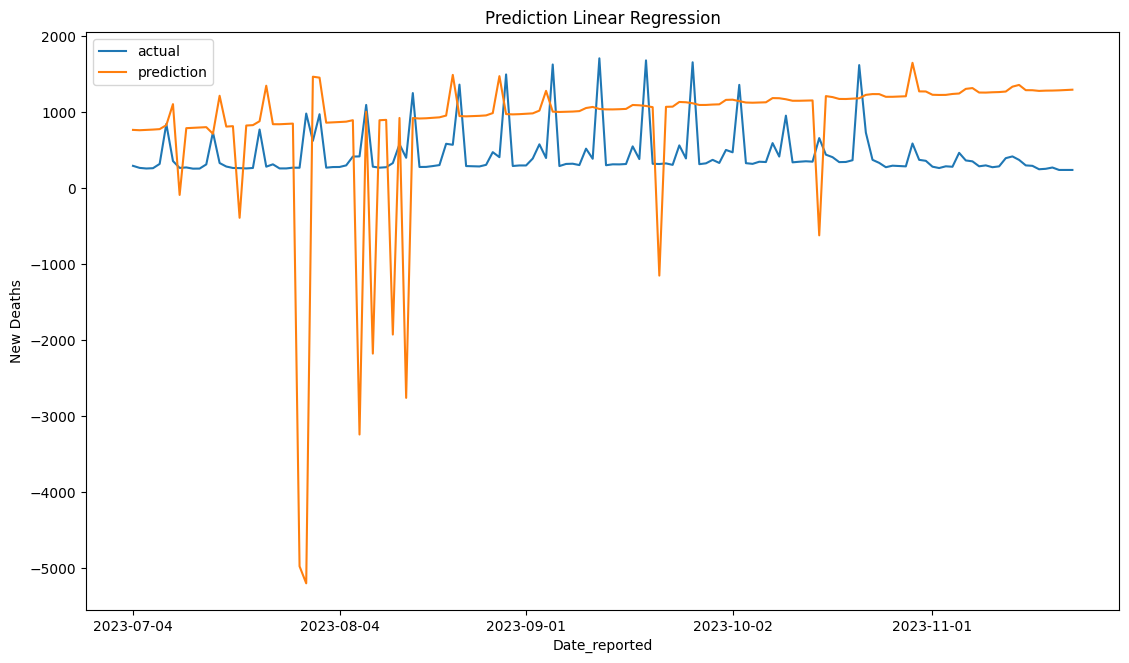

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], pred, label="prediction")
ax.set_title("Prediction Linear Regression")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

RMSE of the result

In [ ]:
print_evaluation_metrics(pred, test[target_column].values)

Evaluation Metrics:
MSE: 1235392.82
RMSE: 1111.48
MAE: 838.04
MAPE: 242.41
SMAPE: 103.01
